In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("meta_mal_label.csv")

In [3]:
df = df.drop(["is_malware","rl_fs_t","rl_ls_const_positives"], axis = 1)

In [4]:
ori = df.copy()

In [5]:
malware_family_list = ["adware","crypto_miner","downloader","dropper","file_infector","flooder","installer","packed",
                    "ransomware","spyware","worm"]

In [6]:
row_max_label = df[malware_family_list].idxmax(axis=1)
row_max_val = df[malware_family_list].max(axis=1)

In [7]:
df.insert(1, "mal_type", row_max_label)
df.insert(2, "mal_max_count", row_max_val)

In [8]:
df = df[row_max_val != 0]

In [9]:
df.reset_index(drop=True)

,sha256,mal_type,mal_max_count,adware,flooder,ransomware,dropper,spyware,packed,crypto_miner,file_infector,installer,worm,downloader
0,e5a0b0f6e5e8c6ed62280261ddccaa7df28f57b4a8e17c...,installer,9,3,0,0,0,0,0,0,0,9,0,0
1,f82ef997639518e43e6e9277f4e5491bac7fe4ab4e3fd8...,adware,1,1,0,0,0,0,0,0,0,0,0,0
2,bc4107fe468733986d7448d60ef8a63685facb038b9d96...,downloader,9,1,0,0,0,0,1,0,0,0,0,9
3,b2568f4980789c84a5e4404b49b2cdd4be81e457a983ed...,adware,1,1,0,0,0,0,0,0,0,0,0,0
4,04a58baa3c039525ac02908ed4aa985cd89c6c0bdbd74d...,adware,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9566714,8822edafc46b519be8dd6f7d06ff292f868a57b7c71170...,file_infector,2,0,0,0,1,0,0,0,2,0,1,0
9566715,551e5c82b78f54b4f463976fa1dac01ba61358fe325937...,spyware,9,0,0,0,0,9,4,0,0,0,0,3
9566716,d1cc8702d273ee9ea8dd1dbd65437f3672b9e12ae7b411...,spyware,12,0,0,0,0,12,0,0,0,0,0,5
9566717,4d47e6b77cb2deb4c47c93ef57c14ac607840ec061c127...,spyware,9,0,0,0,0,9,4,0,0,0,0,3


In [10]:
df = df.sort_values(by=["mal_type","mal_max_count"], ascending=[True, False])

In [11]:
df

,sha256,mal_type,mal_max_count,adware,flooder,ransomware,dropper,spyware,packed,crypto_miner,file_infector,installer,worm,downloader
3740678,79fc43de2857fa48d46262dc8e2b4e467504f915665626...,adware,36,36,0,0,2,0,1,0,0,7,0,1
81544,f69c187d687c1929dd68e4e38039a41271a036525be45e...,adware,35,35,0,0,2,0,0,0,0,6,0,0
2874812,145d20b6bd102d0bc7839ba6c999e9fdaaa712ca1b1508...,adware,35,35,0,0,2,0,1,0,0,7,0,1
5195382,9ba1822467270220b67aa563bf3dac29853a751b22681d...,adware,35,35,0,0,0,0,0,0,0,6,0,0
9495644,e9be1bd5f29756b8ca2b37467fdbc16f106f1022100167...,adware,35,35,0,0,1,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953440,8f6c4f1d5ee5fda67f79fa229b2c1972760d0cda15f1c1...,worm,1,0,0,0,0,0,0,0,0,0,1,0
9953545,a7cb3f6fea264f9206be9088e0b9f613b397f881dc4774...,worm,1,0,0,0,0,0,0,0,0,0,1,0
9954926,923e810f502f9ec45aa3645cefdd149a88039f60306314...,worm,1,0,0,0,0,0,0,0,0,0,1,0
9955203,7e32661b1da90f2b2335242e4225a5293c6bb180163f92...,worm,1,0,0,0,0,0,0,0,0,0,1,0


In [12]:
df.reset_index(drop=True)

,sha256,mal_type,mal_max_count,adware,flooder,ransomware,dropper,spyware,packed,crypto_miner,file_infector,installer,worm,downloader
0,79fc43de2857fa48d46262dc8e2b4e467504f915665626...,adware,36,36,0,0,2,0,1,0,0,7,0,1
1,f69c187d687c1929dd68e4e38039a41271a036525be45e...,adware,35,35,0,0,2,0,0,0,0,6,0,0
2,145d20b6bd102d0bc7839ba6c999e9fdaaa712ca1b1508...,adware,35,35,0,0,2,0,1,0,0,7,0,1
3,9ba1822467270220b67aa563bf3dac29853a751b22681d...,adware,35,35,0,0,0,0,0,0,0,6,0,0
4,e9be1bd5f29756b8ca2b37467fdbc16f106f1022100167...,adware,35,35,0,0,1,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9566714,8f6c4f1d5ee5fda67f79fa229b2c1972760d0cda15f1c1...,worm,1,0,0,0,0,0,0,0,0,0,1,0
9566715,a7cb3f6fea264f9206be9088e0b9f613b397f881dc4774...,worm,1,0,0,0,0,0,0,0,0,0,1,0
9566716,923e810f502f9ec45aa3645cefdd149a88039f60306314...,worm,1,0,0,0,0,0,0,0,0,0,1,0
9566717,7e32661b1da90f2b2335242e4225a5293c6bb180163f92...,worm,1,0,0,0,0,0,0,0,0,0,1,0


In [13]:
cleaned_dataset = []
i = 1
N=1000
for family in malware_family_list:
    mal_index = 0
    temp_list = []
    df_filter_by_family = df[df["mal_type"]==family]
    df_filter_by_family.reset_index(drop=True)
    print(f"{i}. Collecting {family}...")
    i = i + 1
    for index, row in df_filter_by_family.iloc[:N].iterrows():
        temp_list.append(row.sha256)
    cleaned_dataset.append(temp_list)
    df = df.iloc[N: , :]
    print(f"Family {family} done!")
    
print("Dataset Cleaned!!!")
print(ori.shape, df.shape, ori.shape[0] - df.shape[0])   

1. Collecting adware...
Family adware done!
2. Collecting crypto_miner...
Family crypto_miner done!
3. Collecting downloader...
Family downloader done!
4. Collecting dropper...
Family dropper done!
5. Collecting file_infector...
Family file_infector done!
6. Collecting flooder...
Family flooder done!
7. Collecting installer...
Family installer done!
8. Collecting packed...
Family packed done!
9. Collecting ransomware...
Family ransomware done!
10. Collecting spyware...
Family spyware done!
11. Collecting worm...
Family worm done!
Dataset Cleaned!!!
(9962820, 12) (9555719, 14) 407101


In [14]:
index = 0
a=[]
b=[]
data = {"sha256":a, "malware_type":b}
for family in malware_family_list:
    for malware in range(N):
        a.append(cleaned_dataset[index][malware])
        b.append(family)
    index = index + 1
df_clean = pd.DataFrame(data)

In [15]:
df = ori.copy()
df_inner = pd.merge(df, df_clean, on='sha256', how='inner')

In [16]:
df_inner = df_inner.sort_values("malware_type")
df_inner = df_inner[["sha256","malware_type","adware","crypto_miner","downloader","dropper","file_infector","flooder","installer","packed",
                    "ransomware","spyware","worm"]]

In [17]:
df_inner.reset_index(drop=True)

,sha256,malware_type,adware,crypto_miner,downloader,dropper,file_infector,flooder,installer,packed,ransomware,spyware,worm
0,73bef72201237d811aed532120c5633ddd7d5d98ba86ca...,adware,32,0,0,1,0,0,6,0,0,0,0
1,924a2e9d5841793f56f2acaec70edfbf3afea1bb1f379a...,adware,31,0,1,2,0,0,7,1,0,0,0
2,6ce022ef3d29390cae658628349d31f69cb7159f2bc590...,adware,32,0,0,1,0,0,6,0,0,0,0
3,9be9083e4572dc77ce547227954be2cfb13fa295b0aee8...,adware,32,0,0,1,0,0,7,0,0,0,0
4,15d65cb20a73df07e139c78e3002d10cbb3eabd2971ea1...,adware,33,0,0,1,1,0,6,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0e780fa183560e8090751e8f7e75f9d3ab95c47ba38a2a...,worm,0,0,0,0,2,0,0,0,0,10,20
10996,cb83f35a057da2a4c2b0bdd66cd6bc063960ad2873bbdd...,worm,0,0,0,0,2,0,0,0,0,10,20
10997,7b7f852c96544d5680e0dcb19b774a68bccaeae70f06bc...,worm,0,0,0,0,2,0,0,0,0,10,20
10998,d89fb16b3a6d837f47ce0687ded997d3c520b381e4eac2...,worm,0,0,0,0,2,0,0,0,0,10,20


In [18]:
print("Converting to csv....")
df_inner.to_csv(f"new_cleaned_{N*len(malware_family_list)}.csv", index=False)
print("Complete")

Converting to csv....
Complete


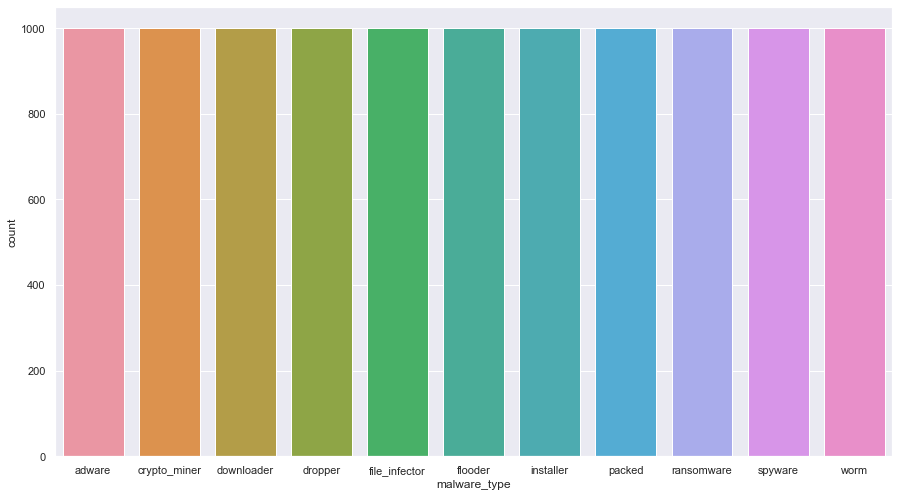

In [19]:
sns.set(rc={'figure.figsize':(15,8.27)})
ax = sns.countplot(x="malware_type",data=df_inner)

In [20]:
n_sample = df_inner.sample(n=9500)

In [21]:
n_sample

,sha256,malware_type,adware,crypto_miner,downloader,dropper,file_infector,flooder,installer,packed,ransomware,spyware,worm
7575,fe7b12848210007e24734fd4243a1b61b821de11a48e3d...,ransomware,0,0,0,0,0,0,0,4,26,0,0
10914,87e887aa6526a2608132da69672d7bc528b035d283a4d8...,dropper,0,0,0,16,0,0,0,0,0,0,0
4025,51047162105dd43bb87763ee980ca9b8b02b59ba151363...,downloader,0,0,21,1,0,0,0,7,0,7,1
2766,59a378247666ef66d8df2dfb056f670dafdbd640bd6021...,packed,0,0,0,7,0,0,0,13,0,7,0
10130,f0acb5379caea9e6fb81a20bd463c6c55009aea0d9ee05...,dropper,0,0,0,15,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,9fb1cd1caf96b4deadc97f07152b82b5be60453527aaee...,flooder,0,0,0,0,0,11,0,3,0,0,0
1027,9e2f7479b088c7574c8595345231f44fab3df730d7e3b6...,worm,0,0,0,0,2,0,0,0,0,10,20
9074,13a141a0a69ec4649e96175995e55070c94a8d1917a445...,ransomware,0,0,0,0,0,0,0,5,27,0,0
630,05a910bd127d92540512ef4495967dbccfb2898563b048...,worm,0,0,0,0,2,0,0,0,0,10,20


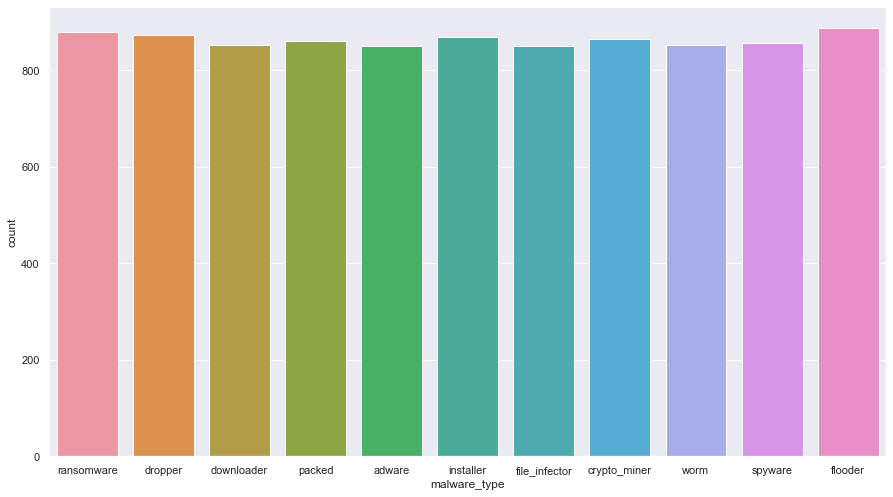

In [22]:
ax = sns.countplot(x="malware_type",data=n_sample)